In [2]:
import random
from openeye.oechem import *
import os
directory = "/Users/jfeng1/Datasets/ADME"
sdf = os.path.join(directory,"mdck_druglike_pca.sdf")

class PCAMol:
    def __init__(self, smiles, name, pc_1, pc_2, has_data):
        self.smiles = smiles
        self.name = name
        self.pc_1 = pc_1
        self.pc_2 = pc_2
        self.has_data = has_data
    
        
mol = OEGraphMol()
ifs = oemolistream()
ifs.open(sdf)
mollist = []
x = []
y = []
while OEReadMolecule(ifs,mol):
    smiles = OEMolToSmiles(mol)
    name = mol.GetTitle()
    pc_1 = float(OEGetSDData(mol,"PC_1"))
    pc_2 = float(OEGetSDData(mol,"PC_2"))
    x.append(pc_1)
    y.append(pc_2)
    has_data = int(OEGetSDData(mol,"MDCK_WithData"));
    mollist.append(PCAMol(smiles,name,pc_1,pc_2,has_data))
print max(x),min(x),max(y),min(y)

2.06629922106 -3.54846659694 5.18564356256 -3.23156645355


In [4]:
import numpy
import math
min_x = min(x)
max_x = max(x)
min_y = min(y)
max_y = max(y)
print math.floor(min_x),math.floor(min_y),math.ceil(max_x),math.ceil(max_y)

-4.0 -4.0 3.0 6.0


In [5]:
xx = numpy.linspace(min_x,max_x,num=50)
yy = numpy.linspace(min_y,max_y,num=50)
xv,yv = numpy.meshgrid(xx,yy)
print len(xv),len(yv)

50 50


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,

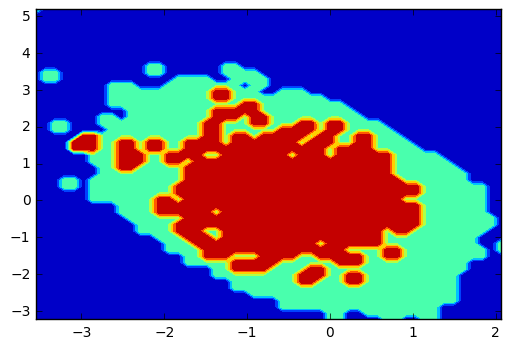

In [6]:
from matplotlib import pyplot as plt
x_step = (max_x-min_x)/50.0
y_step = (max_y-min_y)/50.0
z = []
for id1,v1 in enumerate(xv):
    a = []
    for id2,v2 in enumerate(v1):
        x = xv[id1][id2]
        y = yv[id1][id2]
        n = 0
        for mol in mollist:
            # if mol.has_data == 1:
            x1 = mol.pc_1
            y1 = mol.pc_2
            if math.fabs(x-x1) < x_step and math.fabs(y-y1) < y_step:
                if mol.has_data == 1:
                    n = 2
                else:
                    n = 1
            
        a.append(n)
    z.append(a)
plt.contourf(xv,yv,z)
plt.show()

765


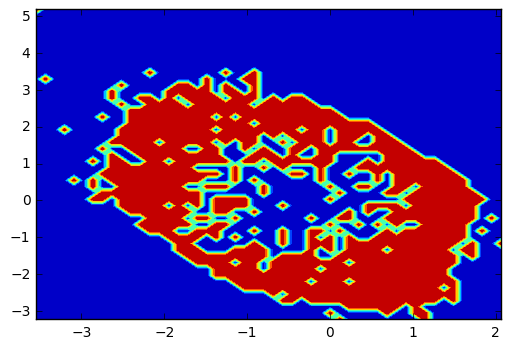

In [7]:
x_step = (max_x-min_x)/50.0
y_step = (max_y-min_y)/50.0

z = []
for id1,v1 in enumerate(xv):
    a = []
    for id2,v2 in enumerate(v1):
        x = xv[id1][id2]
        y = yv[id1][id2]
        a.append(0)
    z.append(a)

for id1,v1 in enumerate(xv):
    for id2,v2 in enumerate(v1):
        x = xv[id1][id2]
        y = yv[id1][id2]
        for mol in mollist:
            if not mol.has_data == 1:
                continue
            x1 = mol.pc_1
            y1 = mol.pc_2
            if math.fabs(x-x1) < x_step/2.0 and math.fabs(y-y1) < y_step/2.0:
                z[id1][id2] = 1

selected_molIds = []
for id1,v1 in enumerate(xv):
    for id2,dummy in enumerate(v1):
        if z[id1][id2] == 1:
            continue

        x = xv[id1][id2]
        y = yv[id1][id2]
        for molId,mol in enumerate(mollist):
            if mol.has_data == 1:
                continue

            x1 = mol.pc_1
            y1 = mol.pc_2
            if math.fabs(x-x1) < x_step/2.0 and math.fabs(y-y1) < y_step/2.0:
                if molId not in selected_molIds:
                    selected_molIds.append(molId)
                    z[id1][id2] = 2
                    break
                    
for id1,v1 in enumerate(xv):
    for id2,dummy in enumerate(v1):
        if z[id1][id2] == 1:
            z[id1][id2] = 0

print len(selected_molIds)            
plt.contourf(xv,yv,z)
plt.show()

In [8]:
file = open("/Users/jfeng1/selected.txt","w")
for id in selected_molIds:
    mol = mollist[id]
    print >> file, mol.smiles,mol.name,mol.pc_1,\
        mol.pc_2,mol.has_data
file.close()